## 1. https://chatgpt.com/share/673e6e9f-9570-8012-becb-0e04ae2d9485
### (a) **Type of Problem a Classification Decision Tree Addresses**

A **Classification Decision Tree** is used to solve **classification problems** where the goal is to assign a label or category to an input based on its features. It works by recursively splitting the dataset into subsets based on feature values to create branches, with the leaves representing the predicted class.

#### Examples of Real-World Applications:
1. **Medical Diagnosis**:
   - Predicting whether a patient has a disease (e.g., diabetes) based on input features like age, weight, glucose levels, etc.
   
2. **Customer Segmentation**:
   - Classifying customers into different segments (e.g., loyal, at-risk) based on purchase history, demographics, and behavior.

3. **Fraud Detection**:
   - Identifying whether a financial transaction is fraudulent based on transaction details such as amount, location, and frequency.

4. **Spam Email Classification**:
   - Determining whether an email is spam or legitimate using features like the presence of certain words, sender information, and attachments.

5. **Credit Risk Assessment**:
   - Predicting if a loan applicant is likely to default based on credit score, income, and other financial indicators.

### (b) **Difference Between Classification Decision Tree and Multiple Linear Regression Predictions**

#### **1. Classification Decision Tree:**
   - **Type of Output**: Produces **categorical** outputs (e.g., "Yes" or "No," or one of several classes).
   - **How Predictions Are Made**:
     - It uses a series of decision rules derived from the data to classify an input.
     - Each decision node splits the data based on a feature threshold that maximizes the separation of classes.
     - The final classification is determined at a leaf node, typically based on the majority class of the training examples in that node.

#### **2. Multiple Linear Regression:**
   - **Type of Output**: Produces continuous **numerical** outputs (e.g., predicting house prices, stock returns).
   - **How Predictions Are Made**:
     - It calculates a weighted linear combination of input features, represented as y = b0 + b1x1 + b2x2 + ...... + bnxn, where b0 is the intercept and b1, b2, ...... , bn are the coefficients.
     - The output is a single predicted value, which minimizes the sum of squared differences between predicted and actual values during training.
   - **Example**: Predicting a house's price based on size, location, and number of bedrooms.

### **Key Differences**:
| Aspect                        | Classification Decision Tree         | Multiple Linear Regression           |
|-------------------------------|---------------------------------------|---------------------------------------|
| **Type of Problem**           | Classification (categorical output) | Regression (continuous output)       |
| **Decision Making**           | Uses rules to divide data into classes | Computes a weighted sum of features  |
| **Output**                    | Discrete categories                  | Continuous numerical value           |
| **Interpretability**          | Simple and rule-based                | Mathematical and model-driven         |

## 2. https://chatgpt.com/share/673e6e9f-9570-8012-becb-0e04ae2d9485
1. **Accuracy**:
   - **Scenario**: General-purpose classification tasks where the dataset is balanced (equal number of positives and negatives).
   - **Example**: Predicting whether an email is spam or not spam.
   - **Rationale**: Accuracy is a good metric when false positives and false negatives are equally significant, as it measures the overall correctness of the model.

2. **Sensitivity**:
   - **Scenario**: Situations where missing actual positives is costly.
   - **Example**: Medical diagnosis for a disease.
   - **Rationale**: In medical diagnosis, it's critical to identify as many actual cases (positives) as possible to minimize false negatives, which could lead to untreated patients.

3. **Specificity**:
   - **Scenario**: Cases where correctly identifying negatives is crucial.
   - **Example**: Fraud detection in banking.
   - **Rationale**: High specificity ensures that legitimate transactions (true negatives) are not incorrectly flagged as fraudulent (false positives), which could inconvenience customers.

4. **Precision**:
   - **Scenario**: When the cost of false positives is high.
   - **Example**: Email spam detection.
   - **Rationale**: In spam detection, a high precision minimizes false positives (i.e., important emails mistakenly classified as spam), ensuring users don’t miss critical emails. 
   

| **Metric**   | **Primary Concern**                   | 
|--------------|---------------------------------------|
| **Accuracy** | Overall correctness                   |
| **Sensitivity** | Catching all true positives          |
| **Specificity** | Avoiding false positives             |
| **Precision** | Confidence in positive predictions    |

## 3.

In [4]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

ab_reduced_noNaN = ab.drop(columns=["Weight_oz", "Width", "Height"])  # Remove specified columns
ab_reduced_noNaN = ab_reduced_noNaN.dropna()

ab_reduced_noNaN["Pub year"] = ab_reduced_noNaN["Pub year"].astype(int)
ab_reduced_noNaN["NumPages"] = ab_reduced_noNaN["NumPages"].astype(int)
ab_reduced_noNaN["Hard_or_Paper"] = ab_reduced_noNaN["Hard_or_Paper"].astype("category")

eda_summary = {
    "Shape": ab_reduced_noNaN.shape,
    "Column Types": ab_reduced_noNaN.dtypes.to_dict(),
    "Descriptive Statistics": ab_reduced_noNaN.describe(include="all").to_dict()
}

eda_summary


{'Shape': (319, 10),
 'Column Types': {'Title': dtype('O'),
  'Author': dtype('O'),
  'List Price': dtype('float64'),
  'Amazon Price': dtype('float64'),
  'Hard_or_Paper': CategoricalDtype(categories=['H', 'P'], ordered=False, categories_dtype=object),
  'NumPages': dtype('int64'),
  'Publisher': dtype('O'),
  'Pub year': dtype('int64'),
  'ISBN-10': dtype('O'),
  'Thick': dtype('float64')},
 'Descriptive Statistics': {'Title': {'count': 319,
   'unique': 309,
   'top': 'The Great Gatsby',
   'freq': 3,
   'mean': nan,
   'std': nan,
   'min': nan,
   '25%': nan,
   '50%': nan,
   '75%': nan,
   'max': nan},
  'Author': {'count': 319,
   'unique': 251,
   'top': 'Jodi Picoult',
   'freq': 7,
   'mean': nan,
   'std': nan,
   'min': nan,
   '25%': nan,
   '50%': nan,
   '75%': nan,
   'max': nan},
  'List Price': {'count': 319.0,
   'unique': nan,
   'top': nan,
   'freq': nan,
   'mean': 18.362978056426332,
   'std': 13.976754744173011,
   'min': 1.5,
   '25%': 13.89,
   '50%': 15.0,


## 4. https://chatgpt.com/share/673e73bd-9e04-8012-9b1d-6d47b0a88941

In [36]:
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]

1. **Defining `y`**: 
   - The target variable `y` is being created from the "Hard_or_Paper" column by encoding whether the book is a hardcover (`H`) as 1 and paperback as 0. This binary encoding is necessary for classification tasks.

2. **Defining `X`**:
   - The feature matrix `X` is defined as a single-column DataFrame containing the "List Price" variable. This will serve as the independent variable for the classification task.

255 64


[Text(0.5, 0.8333333333333334, 'List Price <= 17.97\ngini = 0.384\nsamples = 255\nvalue = [189, 66]\nclass = Paperback'),
 Text(0.25, 0.5, 'List Price <= 10.8\ngini = 0.212\nsamples = 183\nvalue = [161, 22]\nclass = Paperback'),
 Text(0.125, 0.16666666666666666, 'gini = 0.369\nsamples = 45\nvalue = [34, 11]\nclass = Paperback'),
 Text(0.375, 0.16666666666666666, 'gini = 0.147\nsamples = 138\nvalue = [127, 11]\nclass = Paperback'),
 Text(0.75, 0.5, 'List Price <= 27.275\ngini = 0.475\nsamples = 72\nvalue = [28, 44]\nclass = Hardcover'),
 Text(0.625, 0.16666666666666666, 'gini = 0.39\nsamples = 49\nvalue = [13, 36]\nclass = Hardcover'),
 Text(0.875, 0.16666666666666666, 'gini = 0.454\nsamples = 23\nvalue = [15, 8]\nclass = Paperback')]

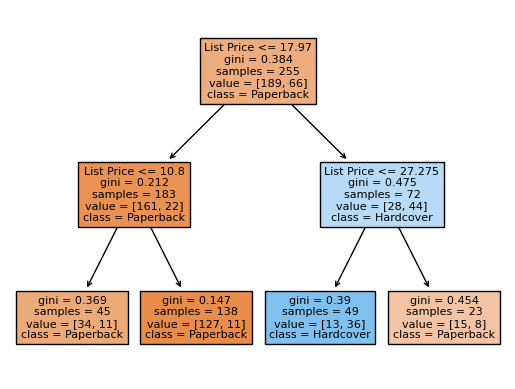

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(len(X_train), len(X_test))
clf = tree.DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

tree.plot_tree(clf, feature_names=["List Price"], class_names=["Paperback", "Hardcover"], filled=True)


The training data set has a size of 255 and the test data set has a size of 64.

### Decision Rules (Based on the Tree Output):
1. **Root Node**:
   - If `List Price <= 17.97`: Go to the left subtree.
   - If `List Price > 17.97`: Go to the right subtree.

2. **Left Subtree (List Price <= 17.97)**:
   - If `List Price <= 10.8`: Predict **Paperback** (gini = 0.369, slightly more uncertainty with 34 paperbacks and 11 hardcovers).
   - If `List Price > 10.8`: Predict **Paperback** (gini = 0.147, stronger confidence with 127 paperbacks and 11 hardcovers).

3. **Right Subtree (List Price > 17.97)**:
   - If `List Price <= 27.275`: Predict **Hardcover** (gini = 0.39, with 13 paperbacks and 36 hardcovers).
   - If `List Price > 27.275`: Predict **Paperback** (gini = 0.454, with 15 paperbacks and 8 hardcovers).

### Summary of Predictions:
- **List Price <= 10.8**: Predict **Paperback**.
- **10.8 < List Price <= 17.97**: Predict **Paperback**.
- **17.97 < List Price <= 27.275**: Predict **Hardcover**.
- **List Price > 27.275**: Predict **Paperback**.

### Visualization of Predictions:
The tree effectively segments the "List Price" into ranges, with the following predictions:

- Low prices (<= 17.97) are primarily predicted as **Paperback**.
- Mid-range prices (17.97 to 27.275) are predicted as **Hardcover**.
- High prices (> 27.275) return to predicting **Paperback**.

## 5.

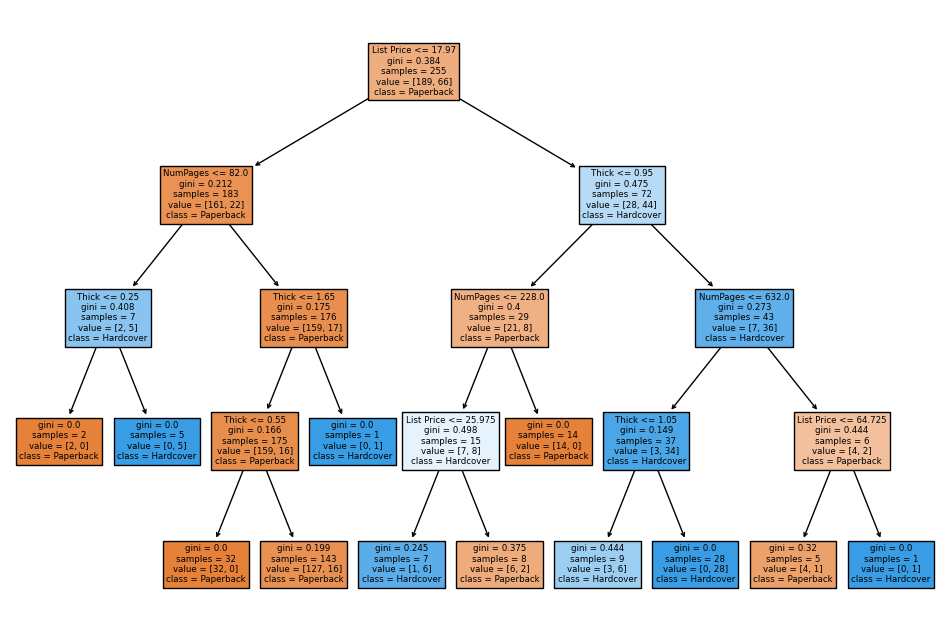

In [32]:
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(
    clf2,
    feature_names=['NumPages', 'Thick', 'List Price'],
    class_names=["Paperback", "Hardcover"],
    filled=True,
)
plt.show()

## 6.

Accuracy: 0.84
Recall: 0.70


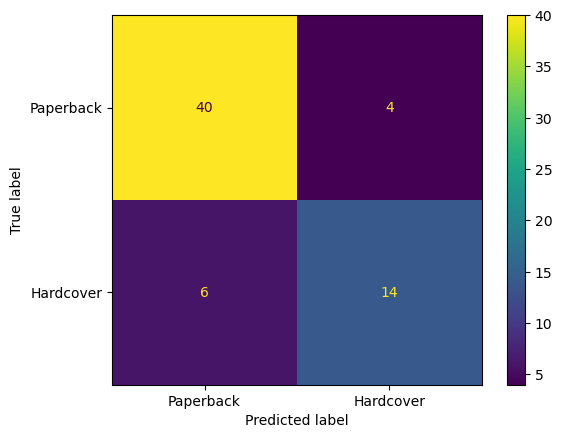

In [38]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Paperback", "Hardcover"])
disp.plot()



Accuracy: 0.86
Recall: 0.75


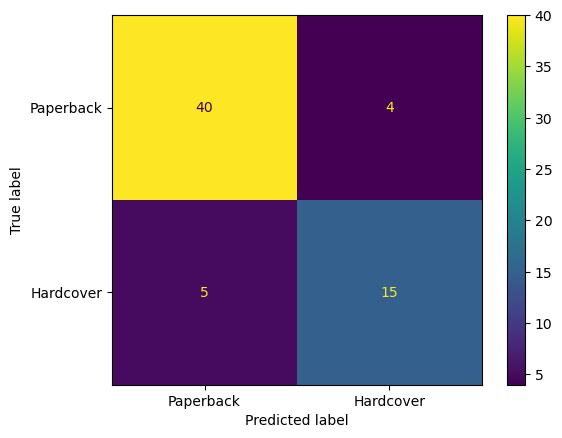

In [35]:
y_pred2 = clf2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
recall2 = recall_score(y_test, y_pred2)

print(f"Accuracy: {accuracy2:.2f}")
print(f"Recall: {recall2:.2f}")

conf_matrix2 = confusion_matrix(y_test, y_pred2)
disp2 = ConfusionMatrixDisplay(conf_matrix2, display_labels=["Paperback", "Hardcover"])
disp2.plot()
plt.show()

In [39]:
clf_TP = 14
clf_FN = 6
clf_TN = 40
clf_FP = 4
clf_total = clf_TP + clf_FN + clf_TN + clf_FP

clf_sensitivity = clf_TP / (clf_TP + clf_FN)
clf_specificity = clf_TN / (clf_TN + clf_FP)
clf_accuracy = (clf_TP + clf_TN) / clf_total

clf2_TP = 15
clf2_FN = 5
clf2_TN = 40
clf2_FP = 4
clf2_total = clf2_TP + clf2_FN + clf2_TN + clf2_FP

clf2_sensitivity = clf2_TP / (clf2_TP + clf2_FN)
clf2_specificity = clf2_TN / (clf2_TN + clf2_FP)
clf2_accuracy = (clf2_TP + clf2_TN) / clf2_total

{
    "clf": {
        "sensitivity": clf_sensitivity,
        "specificity": clf_specificity,
        "accuracy": clf_accuracy
    },
    "clf2": {
        "sensitivity": clf2_sensitivity,
        "specificity": clf2_specificity,
        "accuracy": clf2_accuracy
    }
}


{'clf': {'sensitivity': 0.7,
  'specificity': 0.9090909090909091,
  'accuracy': 0.84375},
 'clf2': {'sensitivity': 0.75,
  'specificity': 0.9090909090909091,
  'accuracy': 0.859375}}

### **Model `clf`**
- **Sensitivity (Recall):** 0.70
- **Specificity:** 0.91
- **Accuracy:** 0.84

### **Model `clf2`**
- **Sensitivity (Recall):** 0.75
- **Specificity:** 0.91
- **Accuracy:** 0.86

Model `clf2` performs slightly better in terms of sensitivity and accuracy while maintaining the same specificity as `clf`.

## 7. 
The first confusion matrix uses only the "List Price" feature, which likely provides limited information about the actual outcome, resulting in lower performance. In contrast, the second confusion matrix uses multiple features: "NumPages," "Thick," and "List Price." These additional features provide more context and improve the model's ability to differentiate between classes, leading to better performance metrics.

The confusion matrices for `clf` and `clf2` are better because they are evaluated on a separate test set (`ab_reduced_noNaN_test`), representing how well the models generalize to unseen data. Models evaluated on training data often show inflated performance due to overfitting, while the test set results are a better indicator of real-world performance.

## 8. https://chatgpt.com/share/673e7fb7-e40c-8012-82b5-db5a0d003493

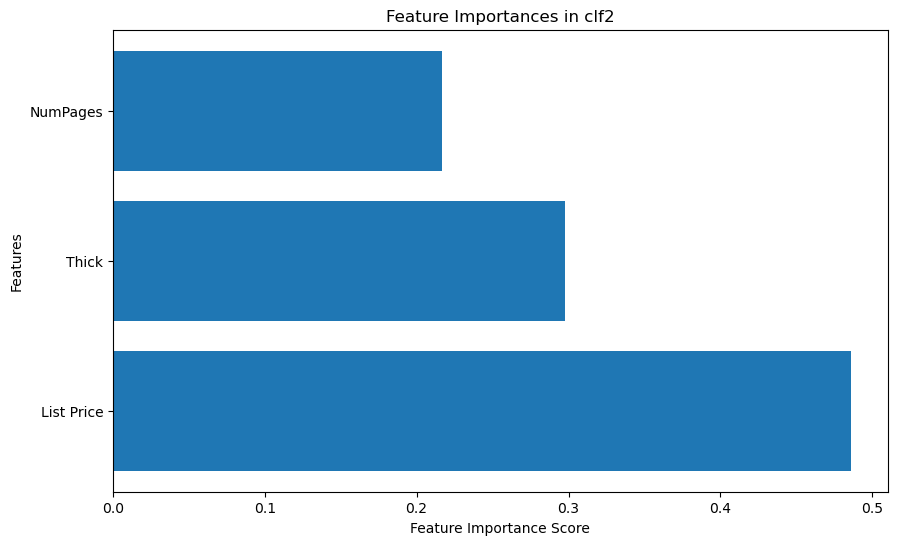

The most important feature is 'List Price' with a score of 0.4860.


In [41]:
# Assuming clf2 is your decision tree classifier
feature_importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_

# Find the most important feature
most_important_feature = feature_names[np.argmax(feature_importances)]
most_important_score = np.max(feature_importances)

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importances in clf2')
plt.gca().invert_yaxis()
plt.show()

# Report the most important feature
print(f"The most important feature is '{most_important_feature}' with a score of {most_important_score:.4f}.")


## 9.
The coefficients in a linear regression model directly quantify the relationship between each predictor and the outcome; they indicate the expected change in the outcome variable for a one-unit increase in the predictor variable, holding all else constant. In contrast, feature importances in decision trees represent the overall contribution of each predictor variable to the model's predictions, determined by the cumulative improvement in the splitting criterion (e.g., Gini impurity or entropy) across all nodes where the feature is used. Unlike regression coefficients, feature importances do not directly indicate the magnitude or direction of the effect of individual predictors.